***Intalar librerias***


In [ ]:
!pip install bnlearn

In [ ]:
import bnlearn as bn

In [ ]:
#Procesamiento de datos
import pandas as pd

#modelo de Redes bayesianas
import bnlearn as bn\

#Graficos
import matplotlib.pyplot as plt

#Estadistica
from scipy import stats

**Lectura de base de datos**

In [ ]:
df = pd.read_csv('/content/chronicDiseaseDataset.csv')

In [ ]:
training_data = df.sample(frac=0.8, random_state=25)
testing_data = df.drop(training_data.index)


In [ ]:
training_data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
3324,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,Osteoarthristis,joint_pain,neck_pain,knee_pain,hip_joint_pain,swelling_joints,painful_walking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
682,Pneumonia,chills,fatigue,cough,high_fever,breathlessness,sweating,malaise,phlegm,chest_pain,fast_heart_rate,rusty_sputum,NaN,NaN,NaN,NaN,NaN,NaN
4584,Hypoglycemia,vomiting,fatigue,anxiety,sweating,headache,nausea,blurred_and_distorted_vision,excessive_hunger,drying_and_tingling_lips,slurred_speech,irritability,palpitations,NaN,NaN,NaN,NaN,NaN
3881,Pneumonia,chills,fatigue,cough,high_fever,breathlessness,sweating,malaise,phlegm,chest_pain,fast_heart_rate,rusty_sputum,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("Test:", training_data.shape)
print("Train", testing_data.shape)

Test: (3936, 18)
Train (984, 18)


## Preparacion de datos

In [ ]:
dft = pd.DataFrame()

dft['Disease'] = training_data['Disease']

for column in training_data.columns[1:]:
  for symptom in training_data[column].unique():
    if pd.notna(symptom):
      dft[symptom] = 0
      dft.loc[training_data[column] == symptom, symptom] = 1

In [ ]:
dft

,Disease,itching,joint_pain,chills,vomiting,fatigue,burning_micturition,stomach_pain,acidity,muscle_weakness,...,rusty_sputum,coma,sinus_pressure,receiving_unsterile_injections,palpitations,stomach_bleeding,runny_nose,congestion,loss_of_smell,blood_in_sputum
3324,Chronic cholestasis,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4052,Osteoarthristis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
682,Pneumonia,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4584,Hypoglycemia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3881,Pneumonia,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208,Hypertension,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1723,Gastroenteritis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3470,Common Cold,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,1,0
1120,Varicose veins,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Matriz de correlación de Spearman

In [ ]:
spearman_corr, _ = stats.spearmanr(dft.drop(columns=['Disease']))

pd.DataFrame(spearman_corr, columns=dft.drop(columns=['Disease']).columns, index=dft.drop(columns=['Disease']).columns)

,itching,joint_pain,chills,vomiting,fatigue,burning_micturition,stomach_pain,acidity,muscle_weakness,skin_rash,...,rusty_sputum,coma,sinus_pressure,receiving_unsterile_injections,palpitations,stomach_bleeding,runny_nose,congestion,loss_of_smell,blood_in_sputum
itching,1.000000,-0.058401,-0.053152,-0.077260,-0.054699,0.328199,0.343059,-0.059116,-0.047803,0.648896,...,-0.047803,-0.046930,-0.046930,0.285072,-0.049924,-0.046930,-0.046930,-0.046930,-0.046930,-0.048662
joint_pain,-0.058401,1.000000,-0.019605,0.708645,0.936612,-0.019167,-0.020035,-0.021805,-0.017633,-0.037896,...,-0.017633,-0.017310,-0.017310,-0.016648,-0.018415,-0.017310,-0.017310,-0.017310,-0.017310,-0.017949
chills,-0.053152,-0.019605,1.000000,-0.025937,-0.018363,-0.017444,-0.018234,-0.019845,-0.016048,-0.034490,...,-0.016048,-0.015755,-0.015755,-0.015152,-0.016760,-0.015755,-0.015755,-0.015755,-0.015755,-0.016336
vomiting,-0.077260,0.708645,-0.025937,1.000000,0.707982,-0.025357,-0.026505,0.578327,-0.023327,-0.050134,...,-0.023327,-0.022901,-0.022901,-0.022025,-0.024362,-0.022901,-0.022901,-0.022901,-0.022901,-0.023746
fatigue,-0.054699,0.936612,-0.018363,0.707982,1.000000,-0.017952,-0.018765,-0.020423,-0.016515,-0.035494,...,-0.016515,-0.016213,-0.016213,-0.015593,-0.017248,-0.016213,-0.016213,-0.016213,-0.016213,-0.016812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
stomach_bleeding,-0.046930,-0.017310,-0.015755,-0.022901,-0.016213,-0.015402,-0.016100,-0.017522,-0.014169,-0.030453,...,-0.014169,1.000000,-0.013910,-0.013378,-0.014798,1.000000,-0.013910,-0.013910,-0.013910,-0.014424
runny_nose,-0.046930,-0.017310,-0.015755,-0.022901,-0.016213,-0.015402,-0.016100,-0.017522,-0.014169,-0.030453,...,-0.014169,-0.013910,1.000000,-0.013378,-0.014798,-0.013910,1.000000,1.000000,1.000000,-0.014424
congestion,-0.046930,-0.017310,-0.015755,-0.022901,-0.016213,-0.015402,-0.016100,-0.017522,-0.014169,-0.030453,...,-0.014169,-0.013910,1.000000,-0.013378,-0.014798,-0.013910,1.000000,1.000000,1.000000,-0.014424
loss_of_smell,-0.046930,-0.017310,-0.015755,-0.022901,-0.016213,-0.015402,-0.016100,-0.017522,-0.014169,-0.030453,...,-0.014169,-0.013910,1.000000,-0.013378,-0.014798,-0.013910,1.000000,1.000000,1.000000,-0.014424


## Grafo probabilistico

In [ ]:
DAG = bn.structure_learning.fit(dft,  methodtype = 'cl',  root_node = 'Disease')

[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/8646.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


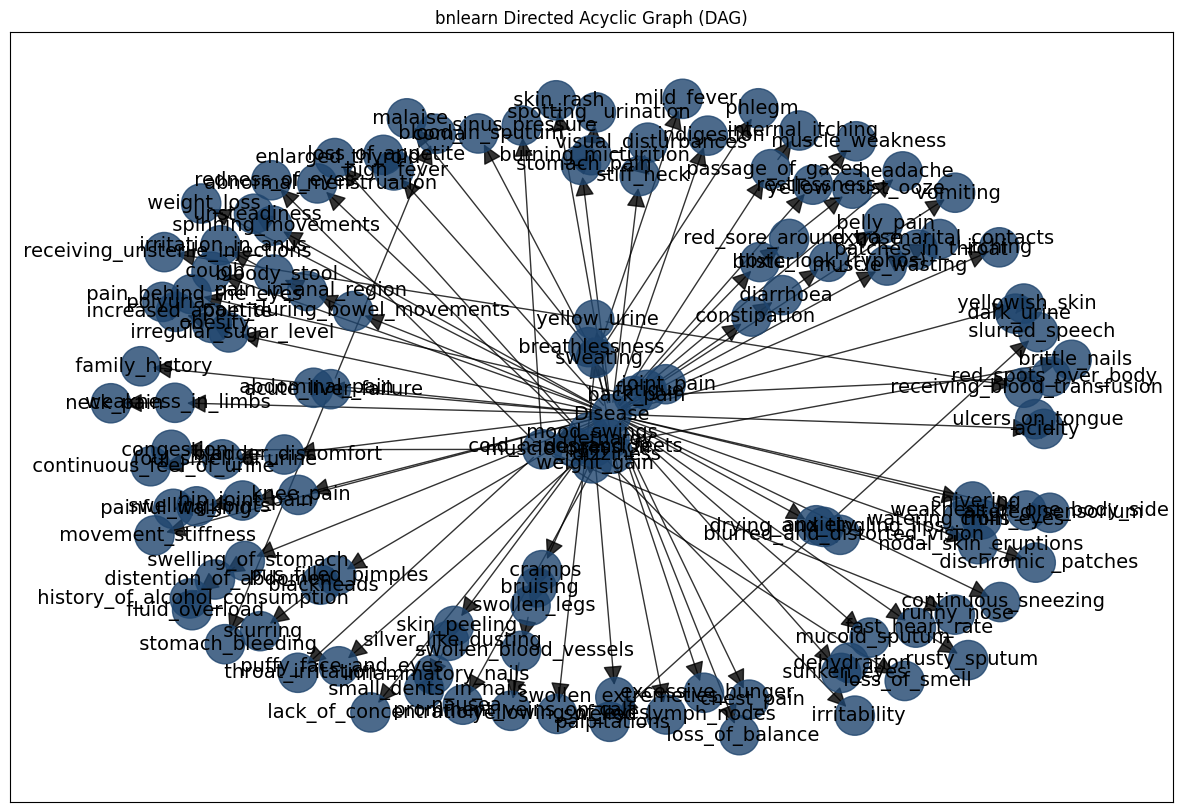

In [ ]:
G = bn.plot(DAG)

## Modelo

In [ ]:
model = bn.parameter_learning.fit(DAG, dft)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Disease:
+--------------------------------------------------+-----------+
| Disease((vertigo) Paroymsal  Positional Vertigo) | 0.0245928 |
+--------------------------------------------------+-----------+
| Disease(AIDS)                                    | 0.0254032 |
+--------------------------------------------------+-----------+
| Disease(Acne)                                    | 0.024998  |
+--------------------------------------------------+-----------+
| Disease(Alcoholic hepatitis)                     | 0.0243902 |
+--------------------------------------------------+-----------+
| Disease(Allergy)                                 | 0.024998  |
+--------------------------------------------------+-----------+
| Disease(Arthritis)                               | 0.0235799 |

## Preparación datos test

In [ ]:
dftest = pd.DataFrame()

dftest['Disease'] = testing_data['Disease']

for column in testing_data.columns[1:]:
  for symptom in testing_data[column].unique():
    if pd.notna(symptom):
      dftest[symptom] = 0
      dftest.loc[testing_data[column] == symptom, symptom] = 1

In [ ]:
dftest

,Disease,continuous_sneezing,shivering,stomach_pain,itching,muscle_wasting,fatigue,sunken_eyes,vomiting,chest_pain,...,rusty_sputum,receiving_unsterile_injections,coma,sinus_pressure,palpitations,stomach_bleeding,runny_nose,congestion,blood_in_sputum,loss_of_smell
10,Allergy,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Allergy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,Allergy,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,GERD,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
32,Chronic cholestasis,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4902,Hepatitis E,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4908,Heart attack,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4911,Hyperthyroidism,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4913,Osteoarthristis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Grafo probabilistico test

In [ ]:
dag_test = bn.structure_learning.fit(dftest,  methodtype = 'cl' )
model_test = bn.parameter_learning.fit(dag_test, dftest)

[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/8646.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Disease:
+--------------------------------------------------+-----------+
| Disease((vertigo) Paroymsal  Positional Vertigo) | 0.0238862 |
+--------------------------------------------------+-----------+
| Disease(AIDS)                                    | 0.0218701 |
+--------------------------------------------------+-----------+
| Disease(Acne)                                    | 0.0228781 |
+--------------------------------------------------+-----------+
| Disease(Alcoholic hepatitis)                     | 0.0243902 |
+--------------------------------------------------+-----------+
| Disease(Allergy)                                 | 0.0228781 |
+--------------------------------------------------+

## Comparación entre test y train

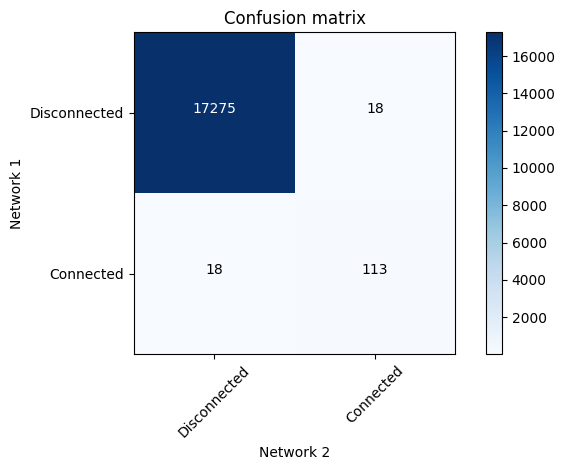

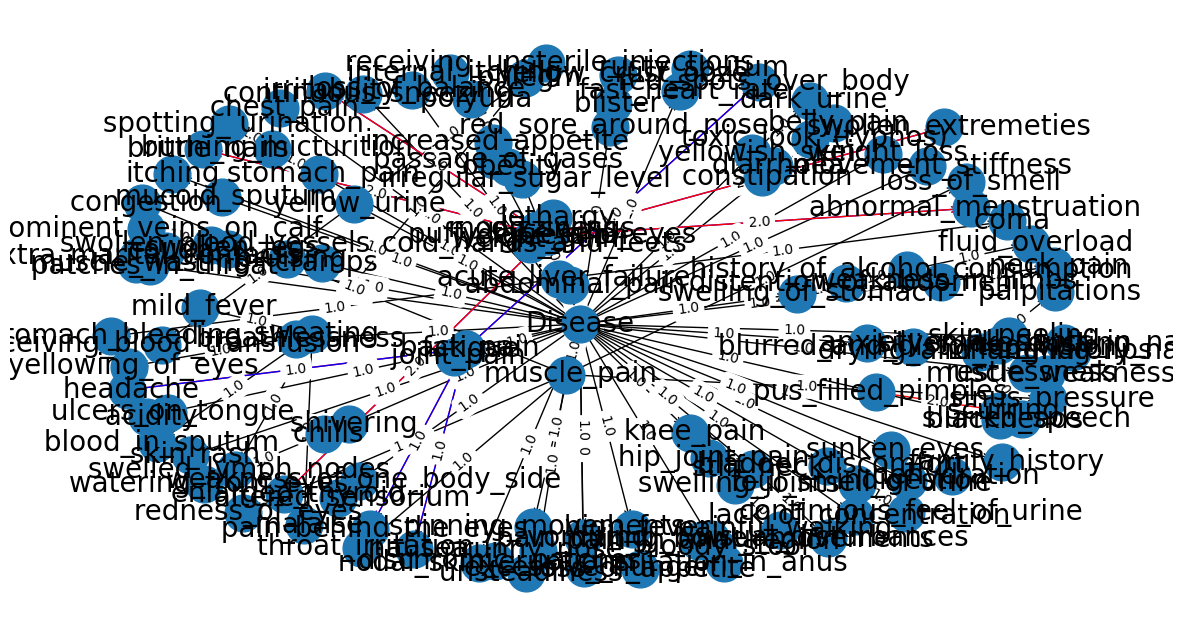

(array([[17275,    18],
        [   18,   113]]),
 target                  Disease  itching   skin_rash   continuous_sneezing  \
 source                                                                       
 Disease                       0        1           1                     1   
 itching                       0        0           0                     0   
  skin_rash                    0        0           0                     0   
  continuous_sneezing          0        0           0                     0   
  indigestion                  0        0           0                     0   
 ...                         ...      ...         ...                   ...   
  irritability                 0        0           0                     0   
  enlarged_thyroid             0        0           0                     0   
  brittle_nails                0        0           0                     0   
  swollen_extremeties          0        0           0                     0   
  

In [ ]:
bn.compare_networks(DAG, dag_test)

## Inferencia

In [ ]:
query = bn.inference.fit(model, variables=['Disease'], evidence={' joint_pain':1, ' burning_micturition':1, ' muscle_weakness':1})
print(query)
print(query.df)

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-----------------------------------------+-----------+
|    | Disease                                 |         p |
+====+=========================================+===========+
|  0 | (vertigo) Paroymsal  Positional Vertigo | 0.0185217 |
+----+-----------------------------------------+-----------+
|  1 | AIDS                                    | 0.0179824 |
+----+-----------------------------------------+-----------+
|  2 | Acne                                    | 0.0182467 |
+----+-----------------------------------------+-----------+
|  3 | Alcoholic hepatitis                     | 0.0186634 |
+----+-----------------------------------------+-----------+
|  4 | Allergy                                 | 0.0182467 |
+----+-----------------------------------------+-----------+
|  5 | Arthritis                               | 0.0192606 |
+----+----

In [ ]:
query2 = bn.inference.fit(model, variables=['Disease'], evidence={' runny_nose':1, ' sinus_pressure':1, ' muscle_weakness':1})
print(query2)
print(query2.df)

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-----------------------------------------+-----------+
|    | Disease                                 |         p |
+====+=========================================+===========+
|  0 | (vertigo) Paroymsal  Positional Vertigo | 0.0208649 |
+----+-----------------------------------------+-----------+
|  1 | AIDS                                    | 0.0206287 |
+----+-----------------------------------------+-----------+
|  2 | Acne                                    | 0.0207445 |
+----+-----------------------------------------+-----------+
|  3 | Alcoholic hepatitis                     | 0.0209267 |
+----+-----------------------------------------+-----------+
|  4 | Allergy                                 | 0.0207445 |
+----+-----------------------------------------+-----------+
|  5 | Arthritis                               | 0.0211865 |
+----+----